<a href="https://colab.research.google.com/github/GuangShuaiWang/Colabnotebook/blob/main/autocorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

这里复现一下自动编解码器的代码，为了可能会使用到的情况作准备，并且加深一下理解。

参考的内容为tensorflow的Autoencoder入门：

第一步是导入要使用的模块，还是常用的pandas，numpy，tensorflow和sklearn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

第二步是选择要使用的数据集，这里是MNIST手写数据集

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


第三步这里就有点内容了，是定义了Autoencorder类，涉及类与对象的关系，是super命令好像是继承父类的全部内容（是继承父类的构造函数然后添加一些新的内容）。

## 关键

这里给出了基于tensorflow来构建自编码器，这里只需要两点，encoder中，定义输出的维度和激活函数即可。而在解码器中，需要给出解码器其中的层数和输出的维度（与输入保持一致）。但是这里其实并不明显，可以查看例子二。比如为什么decoder要为784呢？因为输入的维度为784。

In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

指定优化器和损失函数

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

fit进行训练

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0244 - val_loss: 0.0136
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0096 - val_loss: 0.0097
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.008

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
encoded_imgs[10].reshape(8,8)

array([[1.8814871 , 1.069799  , 2.639005  , 0.        , 1.9296094 ,
        2.702155  , 3.1476405 , 0.45264217],
       [3.0306492 , 4.0308743 , 2.47673   , 1.0862095 , 4.455199  ,
        2.0606036 , 2.607572  , 0.9167434 ],
       [2.1434166 , 0.        , 1.9634918 , 1.0101588 , 4.3678474 ,
        0.34064102, 4.325964  , 1.031603  ],
       [1.5282332 , 2.2104917 , 1.2583147 , 3.3285995 , 0.        ,
        2.5038157 , 1.4432359 , 4.2459793 ],
       [2.9003186 , 4.548811  , 6.340233  , 2.1919823 , 5.157145  ,
        1.4451711 , 0.89640415, 1.5729935 ],
       [0.        , 2.2484798 , 4.90234   , 1.0857122 , 4.4600883 ,
        1.7247177 , 1.1517127 , 3.1531782 ],
       [2.4079127 , 0.31255406, 1.0938377 , 7.6516094 , 0.        ,
        2.633667  , 1.5742698 , 2.254491  ],
       [3.3379505 , 1.1489365 , 1.6166717 , 2.0617259 , 2.4345837 ,
        0.8810798 , 0.        , 1.8292128 ]], dtype=float32)

python中的作图，我觉得这一点我需要多学习，还是不够了解。

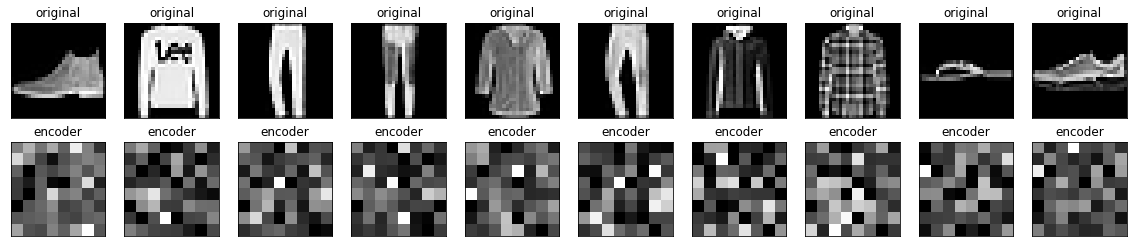

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoder
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(8,8))
  plt.title("encoder")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  #ax = plt.subplot(2, n, i + 1 + n)
  #plt.imshow(decoded_imgs[i])
  #plt.title("reconstructed")
  #plt.gray()
  #ax.get_xaxis().set_visible(False)
  #ax.get_yaxis().set_visible(False)
plt.show()

这里通过验证和损失值来看的话，这个自编码器效果很好，但是查看前后的图像的话，好像没有更好的效果。

# 例子2 图像降噪

这里的例子应该才是非常好的，这部分的网络深刻的给出了编码器与解码器两者之间应该是互为相反的网络结构，然后如果效果好的话使用的是编码器网络架构产生的结果。



In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


这一步是给图像添加噪声，这一步中使用的方法是：tf.random.noraml和tf.clip_by_value这两个。第一个挺好理解的，添加随机的符合正态分布的值。第二个是函数是将向量值限定到特定的范围中。

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

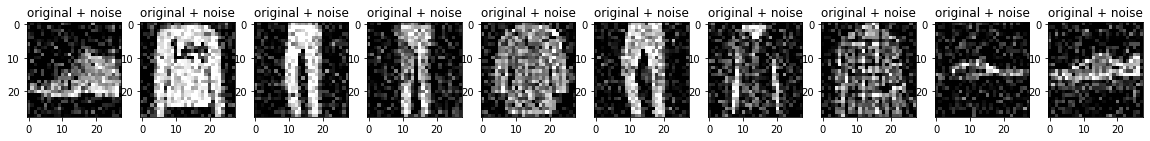

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

这里才是一个比较标准的格式非常的清晰展示出了编码与解码的结构是相反的。

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

定义与训练

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0161 - val_loss: 0.0093
Epoch 2/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0085 - val_loss: 0.0080
Epoch 3/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 4/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0074 - val_loss: 0.0072
Epoch 5/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 6/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 7/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 8/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 9/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 10/10
1875/1875 [==============================] 

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

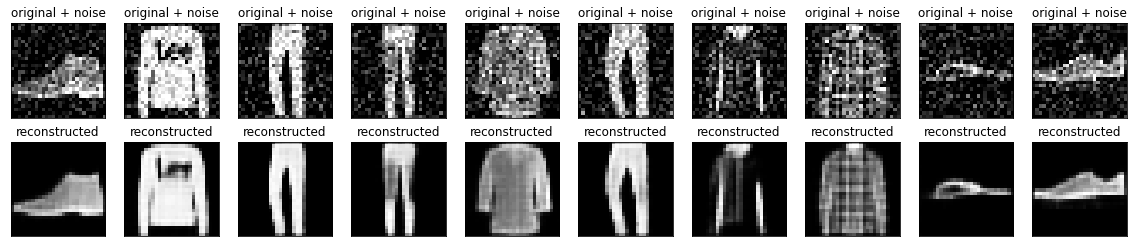

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

但是这里我就有问题了，为什么可以做到降噪的效果呢？

# 例三 通过Autoencoder来检测异常信号

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

总结来说就是，当重构的信号超过一定的误差值，则认为重构的信号是异常信号。其实使用正常的分类模型也可以做到。这里的示例是想说可以检测大型数据集中的没有标签的信号。